**Predicting ART Status for HIV Patients Using Machine Learning: Analyzing Key Factors for Treatment Outcomes\**

---



**Project Goal:**

The goal of this project is to develop a machine learning model that predicts the ARTStatus of HIV patients (e.g., whether they will remain active in treatment, die, transfer out, or be lost to follow-up). The model will leverage various patient attributes, such as age, gender, WHO stage, CD4 count, and viral load, to identify patterns that influence ART treatment outcomes.


**Through detailed Exploratory Data Analysis (EDA) and feature engineering, we aim to prepare the dataset for accurate predictions, focusing on:**

- Understanding the dataset's structure and handling missing or imbalanced data.
-Identifying independent and dependent variables.
- Comparing various machine learning algorithms to find the most accurate model for predicting ARTStatus.
- Providing actionable insights that could potentially improve patient retention and outcomes.



**Let's break down all the variables in the dataset and discuss what each of them represents, including the dependent and independent variables.**

1. Patient's Unique No. Description:

A unique identifier for each patient in the dataset.
Type: Numeric
Use: This column is likely just an identifier and won't contribute to the machine learning model directly. We can drop it before training the model.
2. Gender
Description:

The gender of the patient.
Values: 'M' (Male), 'F' (Female)
Type: Categorical
Use: This is an independent variable that can help in the prediction process, as gender might influence health outcomes.
3. Age
Description:

The age of the patient.
Type: Numeric (Continuous)
Use: An important feature since age is directly related to health outcomes and disease progression.
4. Marital Status
Description:

The marital status of the patient.
Values: 'Single', 'Married', 'Widowed'
Type: Categorical
Use: Another independent variable. Marital status can sometimes be a predictor of health conditions, as social support systems can affect health.
5. Sub-County
Description:

The sub-county where the patient resides.
Type: Categorical
Use: This is an independent variable. The geographic location of the patient may influence access to healthcare, thus impacting their health status.
6. ARTRegimenLine
Description:

The ART (Antiretroviral Therapy) regimen line the patient is on.
Values: 'First line', 'Second line', and some missing values (nan).
First Line: The initial drug regimen given to the patient.
Second Line: A more advanced treatment used when the first line fails.
Type: Categorical
Use: This is a critical independent variable because it relates to the stage of the patient's treatment, which could influence their health outcome.
7. WHOStage
Description:

The World Health Organization (WHO) stage of HIV/AIDS the patient is in.
WHO staging is a classification of HIV progression:
WHO Stage 1: Asymptomatic
WHO Stage 2: Mild symptoms
WHO Stage 3: Advanced symptoms
WHO Stage 4: Severe symptoms
Values: Includes both Adult and Pediatric categories like:
WHO STAGE 1 ADULT, WHO STAGE 2 PEDS, etc.
Some missing values (nan).
Type: Categorical
Use: This is a crucial independent variable since the stage of HIV progression directly impacts the patient's health and treatment outcome.
8. CD4 Count
Description:

The patient's CD4 cell count, a key indicator of immune system health.
Type: Numeric (Continuous)
Use: An important independent variable. CD4 count is often used to assess the progression of HIV and helps in determining treatment plans.
9. Viral Load
Description:

The amount of HIV virus in the patient's blood. This is a crucial measure in assessing how well treatment is working.
Values: Includes nan, 'LDL' (Low Detection Limit), 'HDL' (High Detection Limit).
LDL: Viral load is so low it can't be detected.
HDL: Viral load is higher than the detection limit.
Type: Categorical
Use: This is an independent variable and plays a significant role in assessing treatment effectiveness. The nan values may need to be handled with care, such as imputing or analyzing them separately.
10. Weight
Description:

The weight of the patient.
Type: Numeric (Continuous)
Use: An independent variable. Weight can influence treatment outcomes and may be related to disease progression.
11. Height
Description:

The height of the patient.
Type: Numeric (Continuous)
Use: This variable can be combined with weight to calculate Body Mass Index (BMI), which could be used as a predictor in health-related models.
12. ARTStatus (Dependent Variable)
Description:

The status of the patient's ART treatment.
Values:
Active: Currently receiving treatment.
Others: A status that might need more investigation.
Died: The patient has died.
Transfer out: The patient transferred to another facility.
Lost to followup: The patient is no longer under observation.
Type: Categorical
Use: This is the dependent variable, the one we are trying to predict. Our goal is to determine what factors contribute to different ART statuses (e.g., why some patients may die, stop treatment, or transfer out).

**Step 1: Importing the libraries**

In [1]:
import pandas as pd  # Data manipulation
import numpy as np  # Array manipulation
import matplotlib.pyplot as plt  # Basic plotting
import plotly.express as px  # Interactive plots
import seaborn as sns  # Advanced visualizations
from pylab import rcParams  # Plot configuration
import warnings  # Ignore warnings
sns.set(style="whitegrid")
import plotly.express as px

# Set up the plot styles and ignore warnings
sns.set_style('darkgrid')
rcParams['figure.figsize'] = 8, 8
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

%matplotlib inline

**Step 2: Load Data**

In [18]:
# Load data
data = pd.read_csv('/content/FAVOR PROJECT- EXCEL.csv')

# Show first few rows
data.head()

,Patient's Unique No.,Gender,Age,Marital Status,Sub-County,ARTRegimenLine,WHOStage,CD4 Count,Viral Load,Weight,Height,ARTStatus
0,49.0,M,16,Single,Kitui East,First line,WHO STAGE 1 ADULT,1606.0,NaN,8.05,74.0,Active
1,50.0,F,54,Married,Mwingi West,First line,WHO STAGE 2 ADULT,356.0,LDL,69.00,169.0,Active
2,51.0,F,65,Widowed,Kitui West,First line,WHO STAGE 3 ADULT,459.0,LDL,46.00,144.0,Active
3,52.0,M,36,Married,Kitui West,First line,WHO STAGE 2 ADULT,NaN,LDL,73.00,173.0,Active
4,53.0,M,64,Married,Kitui West,First line,WHO STAGE 3 ADULT,NaN,LDL,52.00,177.0,Active


**Step 3: PERFORM SOME EDA ON THE DATA - GET A FEEL OF IT**

In [3]:
# check the number of rows and columns in the dataset
data.shape

(1014, 12)

In [19]:
# what we are trying to predict - let us find unique values in some variables
print(data['ARTStatus'].unique())
print(data['ARTRegimenLine'].unique())
print(data['WHOStage'].unique())
print(data['Viral Load'].unique())

['Active' 'Others' 'Died' 'Transfer out' 'Lost to followup']
['First line' 'Second line' nan]
['WHO STAGE 1 ADULT' 'WHO STAGE 2 ADULT' 'WHO STAGE 3 ADULT'
 'WHO STAGE 4 ADULT' nan 'WHO STAGE 1 PEDS' 'WHO STAGE 2 PEDS'
 'WHO STAGE 3 PEDS' 'WHO STAGE 4 PEDS']
[nan 'LDL' 'HDL']


In [20]:
# Get a feel for the data types and check for missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient's Unique No.  589 non-null    float64
 1   Gender                1014 non-null   object 
 2   Age                   1014 non-null   int64  
 3   Marital Status        961 non-null    object 
 4   Sub-County            1010 non-null   object 
 5   ARTRegimenLine        689 non-null    object 
 6   WHOStage              1012 non-null   object 
 7   CD4 Count             598 non-null    float64
 8   Viral Load            693 non-null    object 
 9   Weight                826 non-null    float64
 10  Height                826 non-null    float64
 11  ARTStatus             1014 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 95.2+ KB
None


In [21]:
# Categorical Columns
categorical_cols = data.select_dtypes(include=['object']).columns
print(f'Categorical variables : {categorical_cols}')
# Numerical Columns
numerical_cols = data.select_dtypes(include=[np.number]).columns
print(f'Numerical variables : {numerical_cols}')

Categorical variables : Index(['Gender', 'Marital Status', 'Sub-County', 'ARTRegimenLine', 'WHOStage',
       'Viral Load', 'ARTStatus'],
      dtype='object')
Numerical variables : Index(['Patient's Unique No.', 'Age', 'CD4 Count', 'Weight', 'Height'], dtype='object')


In [128]:
# Checking the basic statistics
data.describe(include='all')

,Patient's Unique No.,Gender,Age,Marital Status,Sub-County,ARTRegimenLine,WHOStage,CD4 Count,Viral Load,Weight,Height,ARTStatus
count,589.000000,1014,1014.000000,961,1010,689,1012,598.000000,693,826.000000,826.000000,1014
unique,NaN,2,NaN,7,12,2,8,NaN,2,NaN,NaN,5
top,NaN,F,NaN,Married,Kitui West,First line,WHO STAGE 1 ADULT,NaN,LDL,NaN,NaN,Active
freq,NaN,746,NaN,639,768,658,337,NaN,603,NaN,NaN,589
mean,955.896435,NaN,44.415187,NaN,NaN,NaN,NaN,415.635452,NaN,57.256114,149.754722,NaN
std,1211.145924,NaN,15.872151,NaN,NaN,NaN,NaN,281.597015,NaN,27.116934,28.066060,NaN
min,49.000000,NaN,1.000000,NaN,NaN,NaN,NaN,4.000000,NaN,1.800000,13.000000,NaN
25%,225.000000,NaN,35.000000,NaN,NaN,NaN,NaN,231.250000,NaN,46.000000,150.000000,NaN
50%,642.000000,NaN,46.000000,NaN,NaN,NaN,NaN,364.000000,NaN,54.850000,158.000000,NaN
75%,912.000000,NaN,55.000000,NaN,NaN,NaN,NaN,539.500000,NaN,65.000000,163.000000,NaN


**Initial Insights from the Descriptive Statistics:**

1. **Patient Demographics:**

The Gender variable shows a strong imbalance, with 746 females and only 268 males. This imbalance could affect model predictions, and we may need to adjust or stratify for it during model training.
The Age of patients ranges from 1 to 94 years, with a median age of 46 years. There seems to be a wide age distribution, which may be a significant predictor of ARTStatus.

2. **Marital Status and Sub-County:**

The majority of patients are Married (639 out of 961), which could correlate with their healthcare access or adherence to treatment.
Kitui West is the most frequent sub-county, accounting for 768 of the records, potentially showing a regional concentration of patients.

3. **WHOStage and ARTRegimenLine:**

The most common ARTRegimenLine is "First line," representing 658 of the records. Few patients are on the "Second line," which may require special attention when modeling.
Most patients are classified under WHO STAGE 1 ADULT, which indicates early-stage HIV infection. Later WHO stages (3 and 4) are also present but in smaller numbers, reflecting disease progression.

4. **CD4 Count and Viral Load:**

CD4 Count has a wide range, from 4 to 2011. This variable is crucial for understanding immune status in HIV patients and will likely be highly predictive of ARTStatus.
The Viral Load column contains missing and inconsistent data (e.g., 'LDL', 'HDL'). This requires careful preprocessing to convert categorical values like LDL/HDL into meaningful data, or consider excluding them if not usable.

5. **Weight and Height:**

Weight and Height have typical human ranges, but there are some extreme values (e.g., 8.05 kg for weight and 175 cm for height). Outlier detection or imputation may be necessary for these fields.

6. **ARTStatus:**

ARTStatus distribution indicates that most patients are Active (589 out of 1014), but there are also significant categories like Died, Transfer out, and Lost to follow-up, which are important outcomes for prediction.

Unique values in Gender:
 Gender
F    746
M    268
Name: count, dtype: int64


Unique values in Marital Status:
 Marital Status
Married          639
Single           162
Widowed          102
Divorced          29
Never married     27
Separated          1
married            1
Name: count, dtype: int64


Unique values in Sub-County:
 Sub-County
Kitui West        768
Mwingi West       119
KITUI WEST         44
Kitui Central      32
Mwingi Central     20
Kitui Rural         6
MWINGI WEST         6
Mwingi North        5
Masinga             4
Kitui East          3
Yatta               2
Kilome              1
Name: count, dtype: int64


Unique values in ARTRegimenLine:
 ARTRegimenLine
First line     658
Second line     31
Name: count, dtype: int64


Unique values in WHOStage:
 WHOStage
WHO STAGE 1 ADULT    337
WHO STAGE 2 ADULT    323
WHO STAGE 3 ADULT    268
WHO STAGE 1 PEDS      31
WHO STAGE 4 ADULT     26
WHO STAGE 2 PEDS      13
WHO STAGE 3 PEDS      12
WHO STAGE 4 PEDS       2
Name: count,

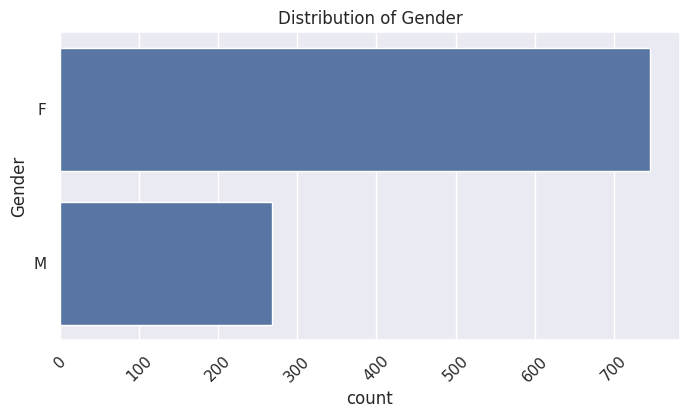

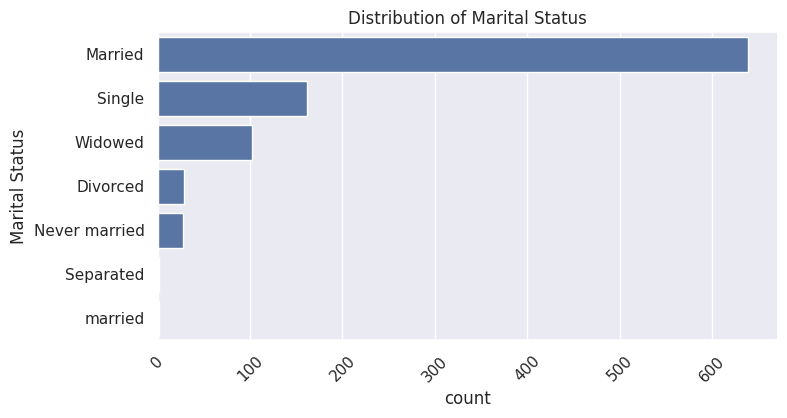

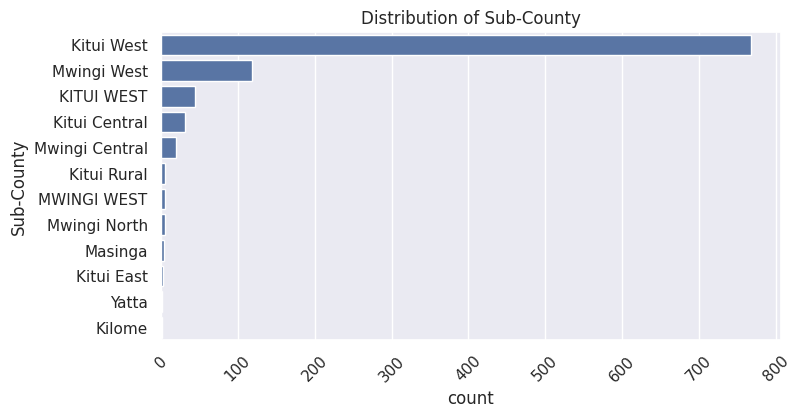

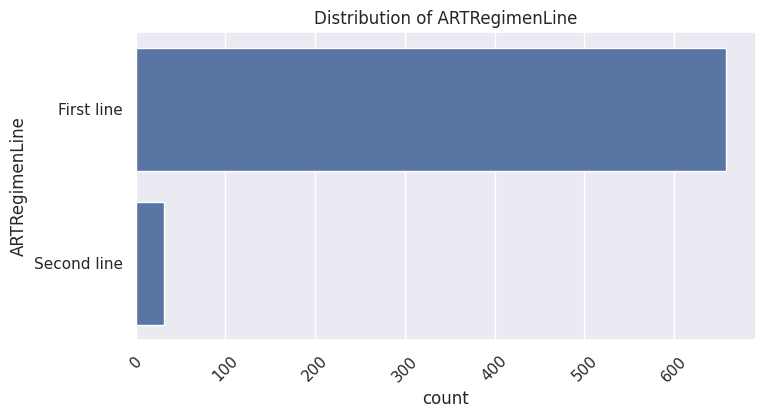

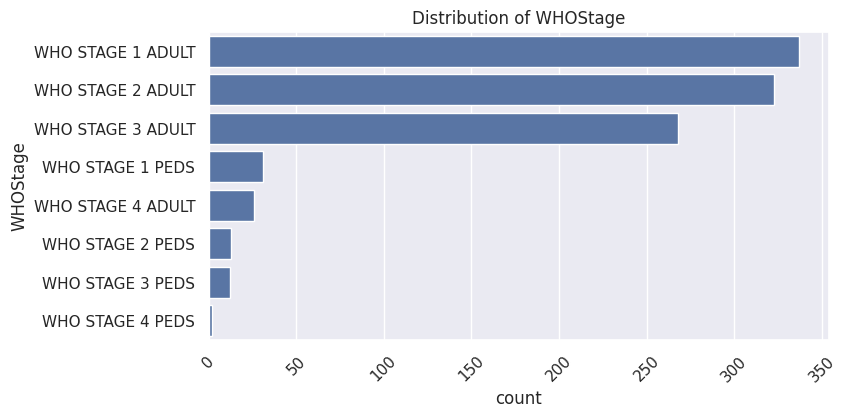

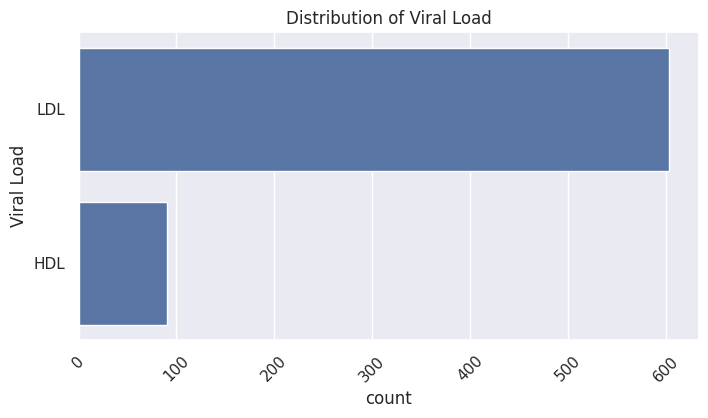

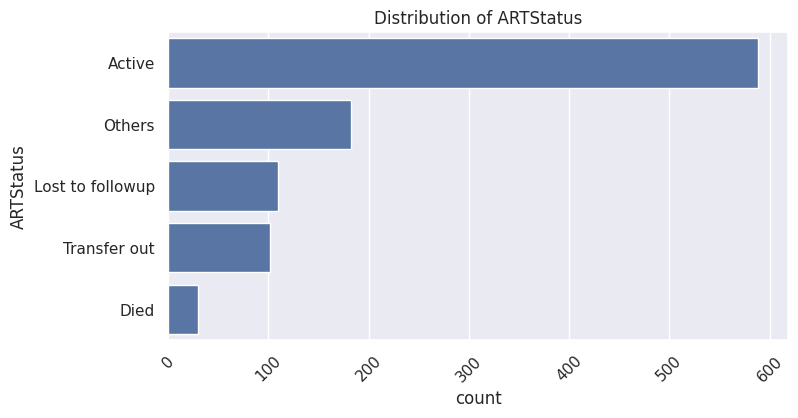

In [22]:
# Explore categorical variables
for col in categorical_cols:
    print(f"Unique values in {col}:\n", data[col].value_counts())
    print("\n")

# Visualize categorical data distributions
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data[col], order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

In [23]:
# Do some cleaning on the data
data['Marital Status'] = data['Marital Status'].str.lower().str.strip()
data['Sub-County'] = data['Sub-County'].str.title().str.strip()
data['WHOStage'] = data['WHOStage'].str.lower().str.replace('adult', 'adults').str.replace('peds', 'pediatrics')
# Merge 'separated' with another class
data['Marital Status'] = data['Marital Status'].replace({'separated': 'divorced'})

# group rare Sub-County values under a new category 'Other'
rare_sub_counties = data['Sub-County'].value_counts()[data['Sub-County'].value_counts() < 5].index
data['Sub-County'] = data['Sub-County'].replace(rare_sub_counties, 'Other')

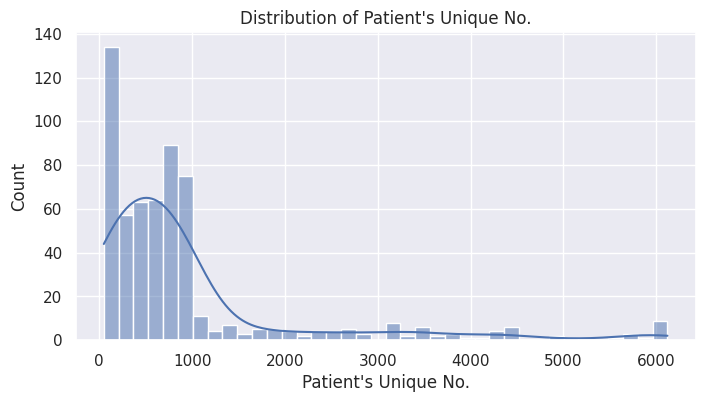

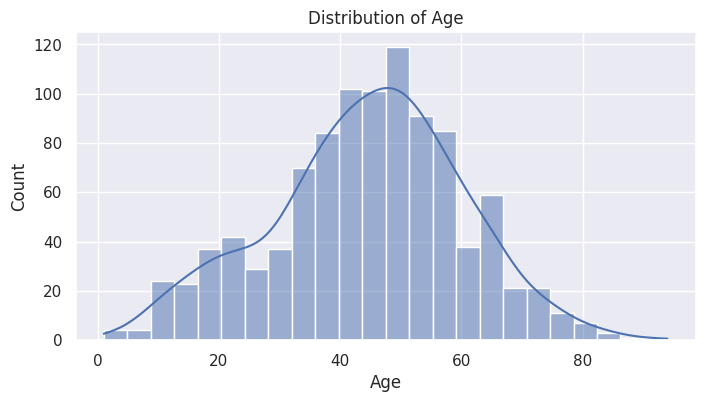

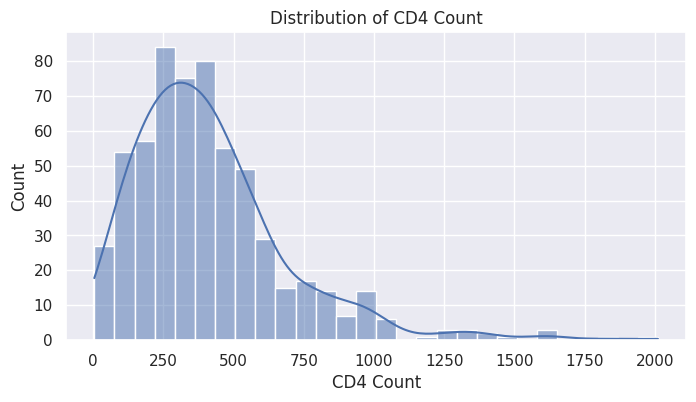

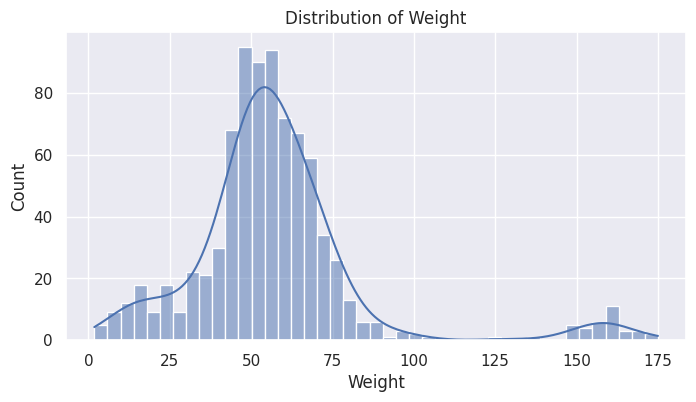

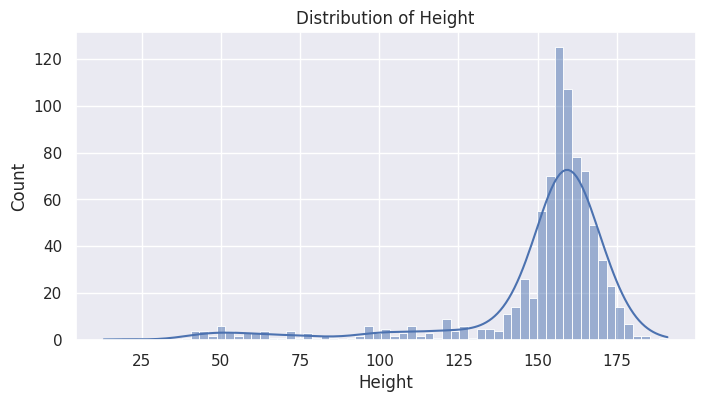

In [16]:
# Explore numerical variables
# for col in numerical_cols:
#     print(f"Unique values in {col}:\n", data[col].value_counts())
#     print("\n")

# Visualize numerical data distributions
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [24]:
# Function to identify outliers
def identify_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Identify outliers
outliers_cd4 = identify_outliers_iqr(data, 'CD4 Count')
outliers_height = identify_outliers_iqr(data, 'Height')
outliers_weight = identify_outliers_iqr(data, 'Weight')

print("Outliers in CD4 Count:\n", outliers_cd4)
print("Outliers in Height:\n", outliers_height)
print("Outliers in Weight:\n", outliers_weight)

Outliers in CD4 Count:
      Patient's Unique No. Gender  Age Marital Status      Sub-County  \
0                    49.0      M   16         single           Other   
6                    55.0      F   27         single     Mwingi West   
25                   74.0      F   41        married      Kitui West   
33                   82.0      M   17         single    Mwingi North   
105                 154.0      M   16  never married      Kitui West   
138                 188.0      F   37         single     Mwingi West   
169                 221.0      F   12  never married      Kitui West   
191                 304.0      M   23  never married      Kitui West   
195                 308.0      F   12  never married      Kitui West   
238                 393.0      M   13  never married      Kitui West   
251                 416.0      F   54        married  Mwingi Central   
276                 477.0      F   55        widowed      Kitui West   
490                 883.0      M   18   

In [25]:
# Function to cap outliers
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data

# Cap outliers in the dataset
data = cap_outliers_iqr(data, 'CD4 Count')
data = cap_outliers_iqr(data, 'Height')
data = cap_outliers_iqr(data, 'Weight')

# Display the updated dataset
print(data[['CD4 Count', 'Height', 'Weight']].describe())

         CD4 Count      Height      Weight
count   598.000000  826.000000  826.000000
mean    403.925376  155.453390   54.763923
std     242.689880   12.440742   17.787068
min       4.000000  130.500000   17.500000
25%     231.250000  150.000000   46.000000
50%     364.000000  158.000000   54.850000
75%     539.500000  163.000000   65.000000
max    1001.875000  182.500000   93.500000


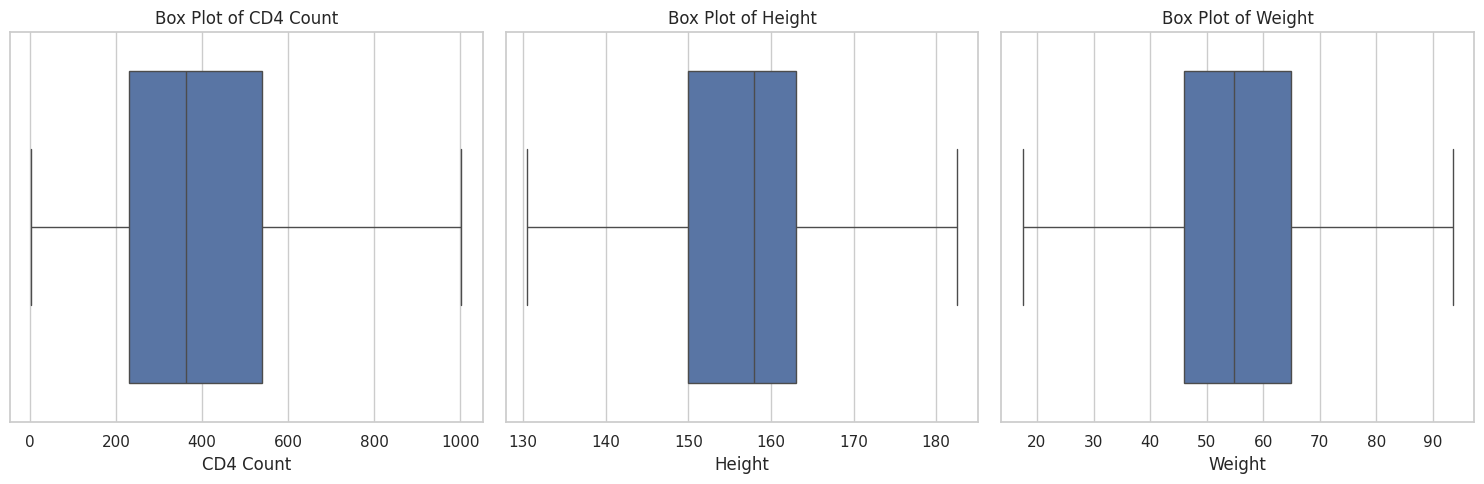

In [26]:
# Set the visual style
sns.set(style="whitegrid")

# Create a figure for the box plots
plt.figure(figsize=(15, 5))

# CD4 Count
plt.subplot(1, 3, 1)
sns.boxplot(x=data['CD4 Count'])
plt.title('Box Plot of CD4 Count')

# Height
plt.subplot(1, 3, 2)
sns.boxplot(x=data['Height'])
plt.title('Box Plot of Height')

# Weight
plt.subplot(1, 3, 3)
sns.boxplot(x=data['Weight'])
plt.title('Box Plot of Weight')

# Show the plot
plt.tight_layout()
plt.show()

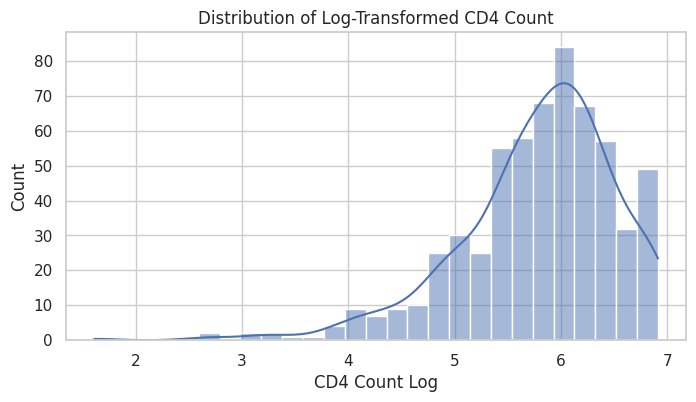

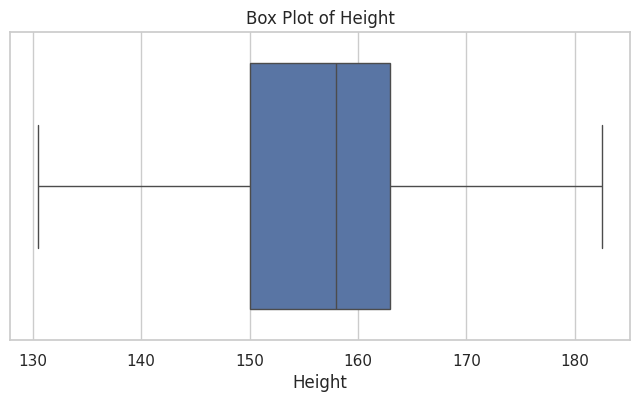

In [27]:
import numpy as np

# Log transform CD4 Count
data['CD4 Count Log'] = np.log1p(data['CD4 Count'])  # Use log1p to handle zeros gracefully

# Visualize transformed CD4 Count
plt.figure(figsize=(8, 4))
sns.histplot(data['CD4 Count Log'], kde=True)
plt.title("Distribution of Log-Transformed CD4 Count")
plt.show()

# Visualize Height with box plot for further outlier analysis
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['Height'])
plt.title('Box Plot of Height')
plt.xlabel('Height')
plt.show()

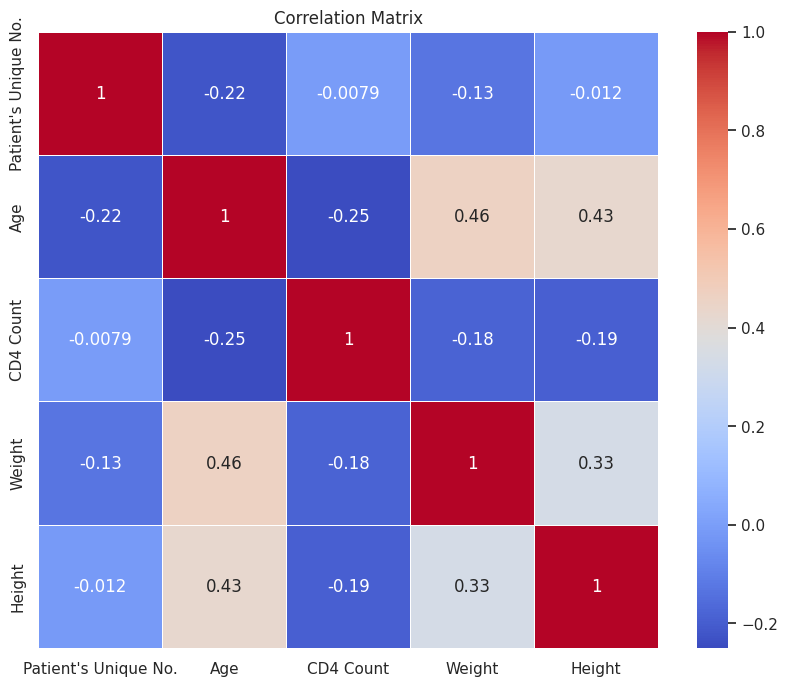

In [30]:
# Correlation matrix for numerical data
corr_matrix = data[numerical_cols].corr()
corr_matrix

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [31]:
# df.isnull().sum() * 100/len(df)
missing_perc = data.isnull().mean()*100
missing_values = pd.DataFrame({'column_name' : data.columns, 'Missing Percentage' : missing_perc})
missing_values

,column_name,Missing Percentage
Patient's Unique No.,Patient's Unique No.,41.913215
Gender,Gender,0.000000
Age,Age,0.000000
Marital Status,Marital Status,5.226824
Sub-County,Sub-County,0.394477
ARTRegimenLine,ARTRegimenLine,32.051282
WHOStage,WHOStage,0.197239
CD4 Count,CD4 Count,41.025641
Viral Load,Viral Load,31.656805
Weight,Weight,18.540434


In [32]:
# Handling missing values for CD4 Count and Viral Load
# CD4 Count: Fill missing values with the median or mean.
data['CD4 Count'].fillna(data['CD4 Count'].median(), inplace=True)

# Viral Load: 'LDL' and 'HDL' are placeholders for 'Low Detectable Level' and 'High Detectable Level'.
# We'll replace 'LDL' with a low value (say 50) and 'HDL' with a high value (say 2000), and fill other missing values with the median.
data['Viral Load'] = data['Viral Load'].replace({'LDL': 50, 'HDL': 2000})
data['Viral Load'] = pd.to_numeric(data['Viral Load'], errors='coerce')
data['Viral Load'].fillna(data['Viral Load'].median(), inplace=True)

# Handling missing values for Weight and Height
# Impute using median as extreme outliers exist.
data['Weight'].fillna(data['Weight'].median(), inplace=True)
data['Height'].fillna(data['Height'].median(), inplace=True)

# Check for any remaining missing values
print(data.isnull().sum())

Patient's Unique No.    425
Gender                    0
Age                       0
Marital Status           53
Sub-County                4
ARTRegimenLine          325
WHOStage                  2
CD4 Count                 0
Viral Load                0
Weight                    0
Height                    0
ARTStatus                 0
CD4 Count Log           416
dtype: int64


In [33]:
# Fill the missing values
cols_to_fill = ['Marital Status', 'Sub-County', 'ARTRegimenLine', 'WHOStage']
for col in cols_to_fill:
    data[col] = data[col].fillna(data[col].mode()[0])

In [34]:
# confirm if there are anymore missing values
data.isnull().sum()

,0
Patient's Unique No.,425
Gender,0
Age,0
Marital Status,0
Sub-County,0
ARTRegimenLine,0
WHOStage,0
CD4 Count,0
Viral Load,0
Weight,0


In [37]:
# Display the number of duplicate rows before dropping them
num_duplicates_before = data.duplicated().sum()
print(f"Number of duplicate rows before dropping: {num_duplicates_before}")

# Drop duplicate rows
data = data.drop_duplicates()

# Display the number of duplicate rows after dropping
num_duplicates_after = data.duplicated().sum()
print(f"Number of duplicate rows after dropping: {num_duplicates_after}")

Number of duplicate rows before dropping: 19
Number of duplicate rows after dropping: 0


In [38]:
# Drop irrelevant columns and set up dependent and independent variables
X = data.drop(['Patient\'s Unique No.', 'ARTStatus'], axis=1)  # Features
y = data['ARTStatus']  # Target variable

print(X.columns)
print(y.value_counts())  # To see the distribution of the target variable

Index(['Gender', 'Age', 'Marital Status', 'Sub-County', 'ARTRegimenLine',
       'WHOStage', 'CD4 Count', 'Viral Load', 'Weight', 'Height',
       'CD4 Count Log'],
      dtype='object')
ARTStatus
Active              589
Others              165
Lost to followup    110
Transfer out        101
Died                 30
Name: count, dtype: int64


In [41]:
from sklearn.impute import SimpleImputer

# Create an imputer for numerical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')  # or use 'median', 'most_frequent' as needed

# Fit and transform the numerical columns
X[numerical_cols] = imputer.fit_transform(X[numerical_cols])


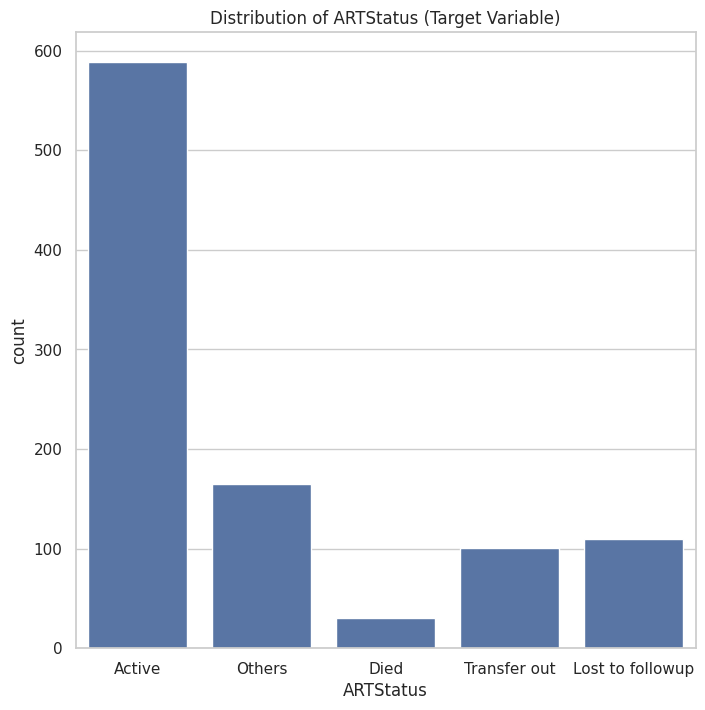

In [39]:
# Check for class imbalance in the target variable
sns.countplot(x=y)
plt.title('Distribution of ARTStatus (Target Variable)')
plt.show()

# If imbalance is observed, it may require techniques like oversampling or SMOTE.

In [42]:
from imblearn.over_sampling import SMOTE

# Identify categorical columns for encoding
categorical_cols = X.select_dtypes(include=['object']).columns

# One-Hot Encoding for categorical features
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Use SMOTE to oversample minority classes
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_encoded, y)

# Check the new distribution after resampling
print(y_res.value_counts())

ARTStatus
Active              589
Others              589
Died                589
Transfer out        589
Lost to followup    589
Name: count, dtype: int64


**Feature Engineering**

Create New Features (e.g., BMI)

To add more predictive power to the model, let's create new features like BMI from Weight and Height

In [43]:
# Create a BMI feature
data['BMI'] = data['Weight'] / ((data['Height'] / 100) ** 2)

# Check if the feature makes sense
print(data[['Weight', 'Height', 'BMI']].head())

   Weight  Height        BMI
0    17.5   130.5  10.275833
1    69.0   169.0  24.158818
2    46.0   144.0  22.183642
3    73.0   173.0  24.391059
4    52.0   177.0  16.598040


In [44]:
data.head()

,Patient's Unique No.,Gender,Age,Marital Status,Sub-County,ARTRegimenLine,WHOStage,CD4 Count,Viral Load,Weight,Height,ARTStatus,CD4 Count Log,BMI
0,49.0,M,16,single,Other,First line,who stage 1 adults,1001.875,50.0,17.5,130.5,Active,6.910626,10.275833
1,50.0,F,54,married,Mwingi West,First line,who stage 2 adults,356.000,50.0,69.0,169.0,Active,5.877736,24.158818
2,51.0,F,65,widowed,Kitui West,First line,who stage 3 adults,459.000,50.0,46.0,144.0,Active,6.131226,22.183642
3,52.0,M,36,married,Kitui West,First line,who stage 2 adults,364.000,50.0,73.0,173.0,Active,NaN,24.391059
4,53.0,M,64,married,Kitui West,First line,who stage 3 adults,364.000,50.0,52.0,177.0,Active,NaN,16.598040


**Advanced EDA - Feature Importance (Using Random Forest)**

We can use Random Forest to determine the most important features.

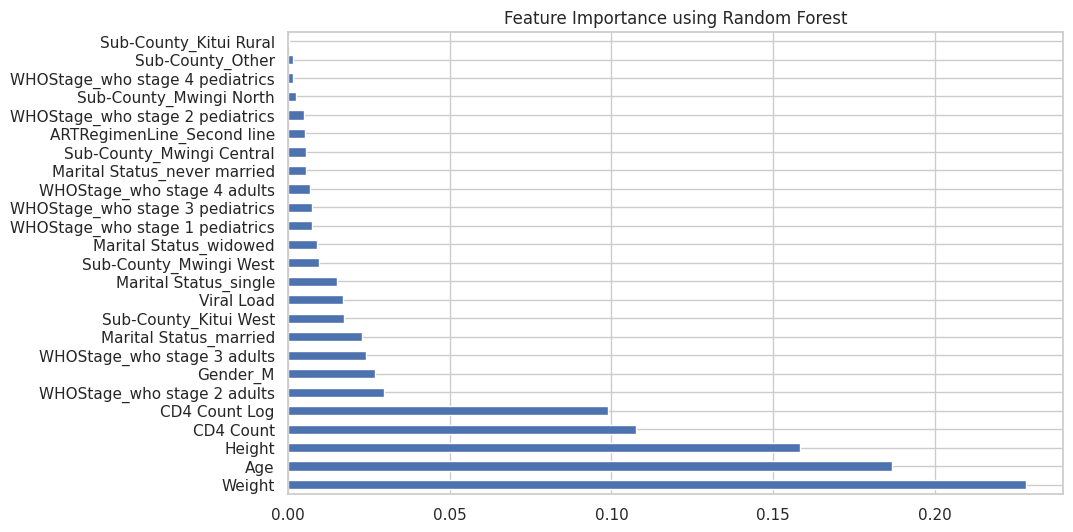

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest to assess feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_encoded, y)

# Plot feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X_encoded.columns)
feature_importances.sort_values(ascending=False).plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance using Random Forest')
plt.show()

In [47]:
!pip install catboost
!pip install xgboost
from sklearn.preprocessing import LabelEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.8 MB/s eta 0:00:00


In [153]:
# y_train_encoded = LabelEncoder.fit_transform(y_train)
# y_test_encoded = LabelEncoder.transform(y_test)

In [48]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assuming X_res and y_res are the oversampled data from the SMOTE step

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# 1. Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate RandomForest
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# 2. CatBoost Classifier
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate CatBoost
print("\nCatBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_catboost))
print(classification_report(y_test, y_pred_catboost))
print(confusion_matrix(y_test, y_pred_catboost))

# 3. XGBoost Classifier
# xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
# xgb_model.fit(X_train, y_train)
# y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost
# print("\nXGBoost Results:")
# print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
# print(classification_report(y_test, y_pred_xgb))
# print(confusion_matrix(y_test, y_pred_xgb))


Random Forest Results:
Accuracy: 0.8585972850678733
                  precision    recall  f1-score   support

          Active       0.77      0.80      0.79       177
            Died       0.93      0.94      0.93       176
Lost to followup       0.79      0.88      0.83       177
          Others       0.91      0.88      0.89       177
    Transfer out       0.91      0.80      0.85       177

        accuracy                           0.86       884
       macro avg       0.86      0.86      0.86       884
    weighted avg       0.86      0.86      0.86       884

[[142   4  21   2   8]
 [ 10 165   1   0   0]
 [  9   3 155   5   5]
 [  5   2  13 156   1]
 [ 18   3   6   9 141]]

CatBoost Results:
Accuracy: 0.833710407239819
                  precision    recall  f1-score   support

          Active       0.73      0.75      0.74       177
            Died       0.92      0.91      0.91       176
Lost to followup       0.80      0.83      0.82       177
          Others       0.84

In [49]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Encode target labels for y_train and y_test
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# 3. XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train_encoded)
y_pred_xgb = xgb_model.predict(X_test)

# Decode the predicted labels back to original categories for reporting
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)

# Evaluation for XGBoost
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_decoded)}")
print(classification_report(y_test, y_pred_xgb_decoded))

Accuracy: 0.833710407239819
                  precision    recall  f1-score   support

          Active       0.75      0.77      0.76       177
            Died       0.93      0.91      0.92       176
Lost to followup       0.79      0.83      0.81       177
          Others       0.88      0.85      0.87       177
    Transfer out       0.83      0.80      0.81       177

        accuracy                           0.83       884
       macro avg       0.84      0.83      0.83       884
    weighted avg       0.84      0.83      0.83       884



**Summary of Results**

Random Forest

shows the highest accuracy and F1-scores across most classes, particularly for the "Died" class, indicating it performs well in classifying this outcome.
CatBoost and XGBoost

have similar accuracies but slightly lower F1-scores compared to Random Forest. Both models perform well in the "Died" class but show more variance in other classes.
The precision and recall indicate that both CatBoost and XGBoost might have more false positives or false negatives, particularly in the "Active" and "Lost to Followup" classes.